In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [17]:
x.head(5)

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [18]:
y.head(5)

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64

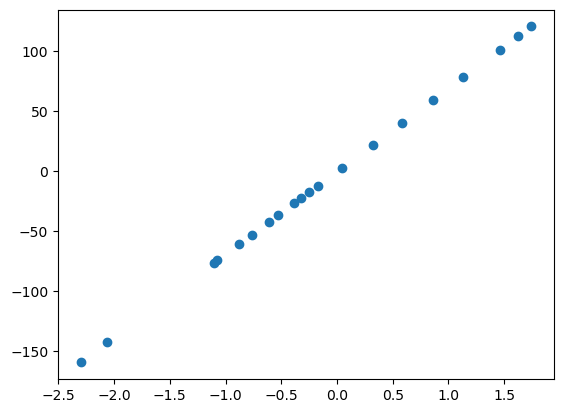

In [19]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [20]:
class Model(object):
    """Модель парной линейной регрессии"""
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [21]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


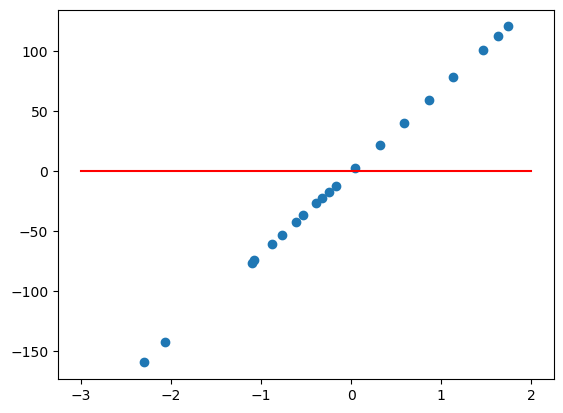

In [22]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [96]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error:", J)

error: 1.9322688565990425e-14


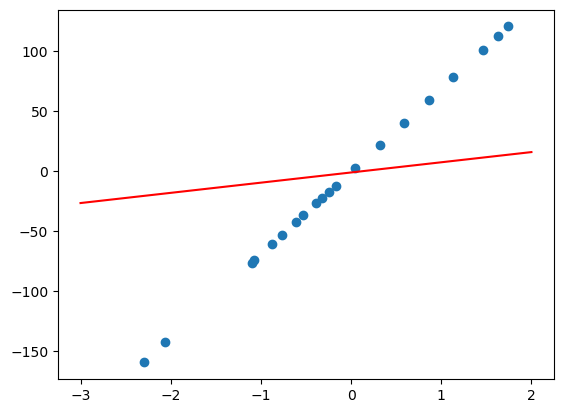

In [24]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(x, Y0, 'r')
plt.show()

In [35]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10_000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [97]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error:", J)

error: 2.5874637691249185e-29


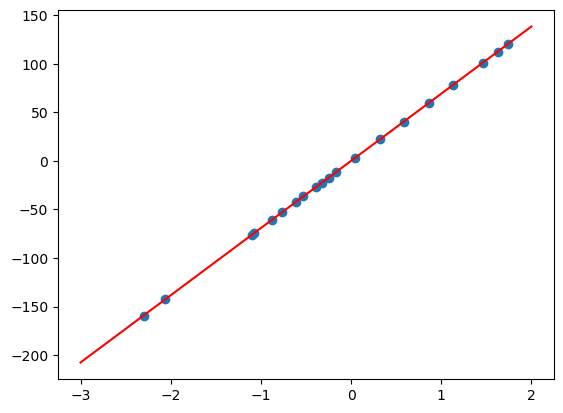

In [37]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

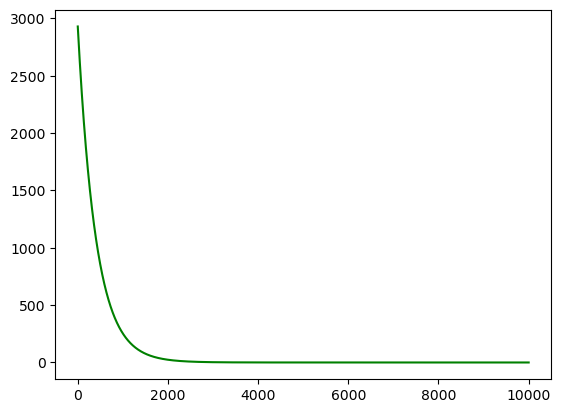

In [38]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

**Задания для самостоятельного выполнения**

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму


2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

error: 2.532736543825211e-29


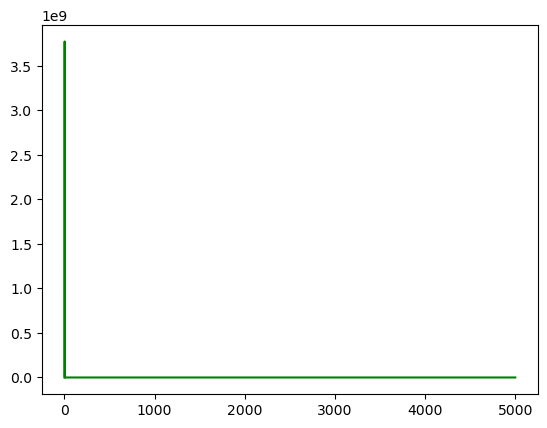

In [98]:
lin_regr = Model()

steps, errors = lin_regr.fit(x, y, alpha = 10)
print("error:", lin_regr.error(x, y))
    
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

error after gradient descent: 3.0967720910582346e-29


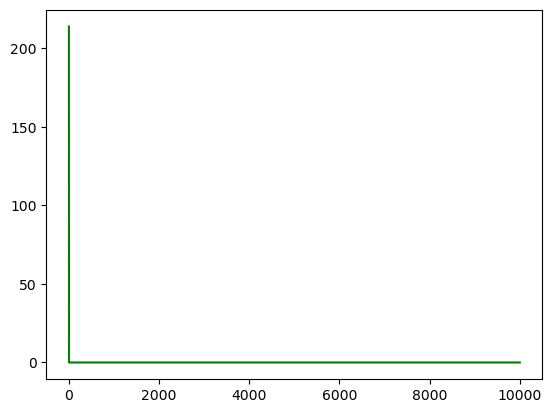

In [45]:
lin_regr = Model()

steps, errors = lin_regr.fit(x, y, alpha = 1)
print("error after gradient descent:", lin_regr.error(x, y))
    
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

error: 2.48088866082956e-27


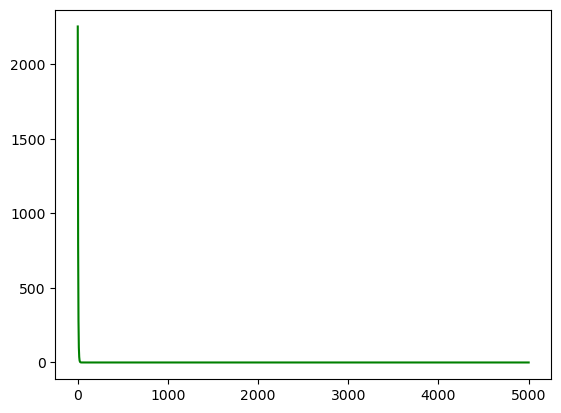

In [99]:
lin_regr = Model()

steps, errors = lin_regr.fit(x, y, alpha = 0.1)
print("error:", lin_regr.error(x, y))
    
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

error: 4.434682750111012e-25


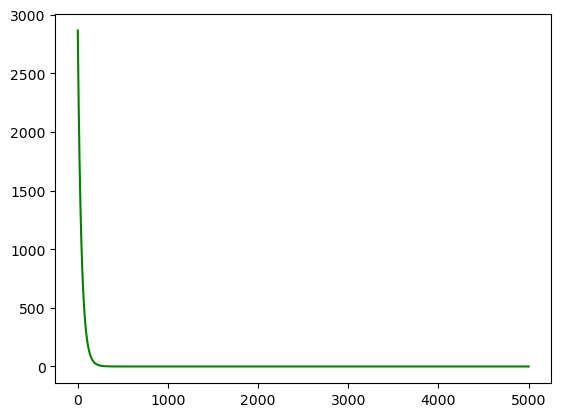

In [100]:
lin_regr = Model()

steps, errors = lin_regr.fit(x, y, alpha = 0.01)
print("error:", lin_regr.error(x, y))
    
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

error: 0.039373213031129055


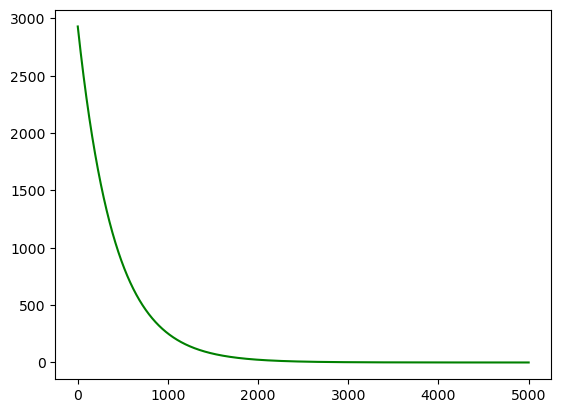

In [101]:
lin_regr = Model()

steps, errors = lin_regr.fit(x, y, alpha = 0.001)
print("error:", lin_regr.error(x, y))
    
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

error after gradient descent: 253.47092542308437


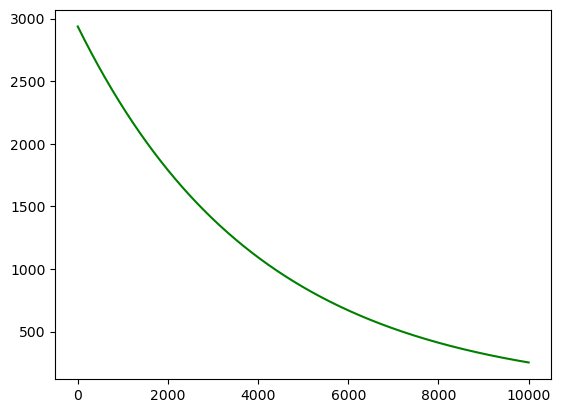

In [53]:
lin_regr = Model()

steps, errors = lin_regr.fit(x, y, alpha = 0.0001)
print("error after gradient descent:", lin_regr.error(x, y))
    
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [54]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10_000):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [57]:
x_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv').drop(columns = ['Unnamed: 0'])
y_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv').drop(columns = ['Unnamed: 0'])

In [58]:
x_df.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [60]:
x_s = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y_s = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [61]:
x_s.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [102]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df)
print("error:", lin_regr.error(x_df, y_df))

error: 2.5874637691249185e-29


In [103]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_s, y_s)
print("error:", lin_regr.error(x_s, y_s))

error: 2.5874637691249185e-29


4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [107]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000):
        eps = 0.000001
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1
            if len(errors) != 0 and errors[-1] - new_err < eps:
                print('совершено меньше steps')
                return steps, errors          
            steps.append(step)
            errors.append(new_err)
        print('завершение по количеству steps')
        return steps, errors

In [108]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df)
print("error:", lin_regr.error(x, y))

совершено меньше steps
error: 0.0005244076717215662


5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [109]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df, max_steps = 100)
print("error:", lin_regr.error(x, y))

завершение по количеству steps
error: 2291.882685525399


In [110]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df, max_steps = 10000)
print("error:", lin_regr.error(x, y))

совершено меньше steps
error: 0.0005244076717215662
